<a href="https://colab.research.google.com/github/mishad01/Deep-Learning-and-Machine-Learning/blob/main/Thesis%20topic%20practice/4_Regression_Problem_Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Thesis Practice/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [162]:
df.shape

(500, 9)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [164]:
df.duplicated().sum()

0

In [165]:
X = df.iloc[:,1:8]
y = df.iloc[:,-1]

In [166]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [168]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [169]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [170]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [171]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [172]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


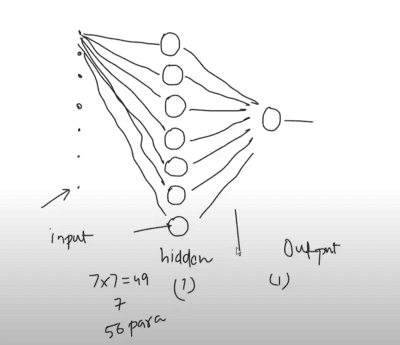

In [173]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(optimizer='Adam', loss='mean_squared_error') # configure the model before training.

The line:

```python
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)
```

is used to train a machine learning model (likely a neural network built with TensorFlow/Keras). Here’s what each part does:

- **`model.fit(...)`**: This method trains the model using the given training data.
- **`X_train_scaled`**: The input training data (features) that has been scaled (e.g., using normalization or standardization).
- **`y_train`**: The corresponding labels (target values) for the training data.
- **`epochs=10`**: The model will go through the entire dataset **10 times** to adjust the weights and improve performance.
- **`validation_split=0.2`**: This means **20% of the training data** will be set aside for validation. The model trains on **80%** of `X_train_scaled` and `y_train`, and the remaining **20%** is used to evaluate the model’s performance after each epoch.

When you set `validation_split=0.2`, it means **20% of the training data** (`X_train_scaled` and `y_train`) will be separated for validation, and the model will train on the remaining **80%**.  

### Breakdown of What Happens:
1. Suppose `X_train_scaled` has **10,000 samples**.
2. With `validation_split=0.2`:
   - **8,000 samples (80%)** are used for actual training.
   - **2,000 samples (20%)** are used for validation.
3. After each **epoch**, the model:
   - Uses the **training set (80%)** to update the weights.
   - Uses the **validation set (20%)** to check performance on unseen data (not used for training).
   - Displays `val_loss` and `val_accuracy` (or other metrics) to show how well it's generalizing.

💡 **Key Point:** The validation set is **not** used to train the model—it helps detect overfitting by evaluating the model on unseen data after each epoch.

In [175]:
history = model.fit(X_train_scaled,y_train,epochs= 10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2780 - val_loss: 0.2182
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2137 - val_loss: 0.1409
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1346 - val_loss: 0.0817
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0851 - val_loss: 0.0442
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - val_loss: 0.0273
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0327 - val_loss: 0.0229
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0275 - val_loss: 0.0223
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0283 - val_loss: 0.0211
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - val_loss: 0.0194
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - val_loss: 0.0180


In [176]:
y_pred = model.predict(X_test_scaled) #The trained model predicts outputs (y_pred) using X_test_scaled.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [177]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2423981413908658

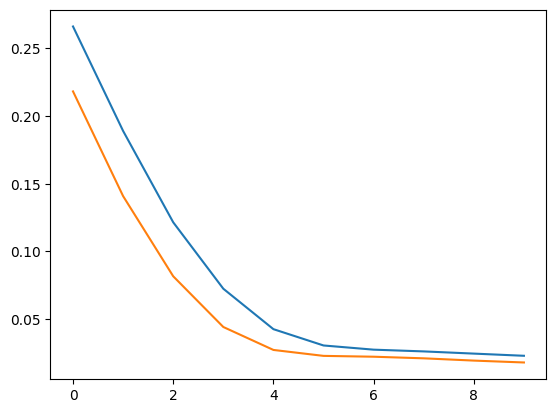

In [179]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
